In [ ]:
import os
import numpy as np
from osgeo import gdal
from skimage import io

In [ ]:
import os
import numpy as np
from osgeo import gdal, osr

def split_raster_and_mask(raster_path, mask_path, output_folder):
    # Load raster and mask
    raster_ds = gdal.Open(raster_path)
    mask_ds = gdal.Open(mask_path)

    # Get raster size and geotransformation information
    raster_width = raster_ds.RasterXSize
    raster_height = raster_ds.RasterYSize
    raster_gt = raster_ds.GetGeoTransform()

    # Determine the number of patches in each dimension
    num_patches_x = raster_width // 256
    num_patches_y = raster_height // 256

    # Iterate through each patch
    for i in range(num_patches_x):
        for j in range(num_patches_y):
            # Define patch boundaries
            x_offset = i * 256
            y_offset = j * 256
            patch_size_x = min(256, raster_width - x_offset)
            patch_size_y = min(256, raster_height - y_offset)

            # Read raster patch
            raster_patch = raster_ds.ReadAsArray(x_offset, y_offset, patch_size_x, patch_size_y)

            # Read mask patch
            mask_patch = mask_ds.ReadAsArray(x_offset, y_offset, patch_size_x, patch_size_y)

            # Create output folder if it doesn't exist
            output_subfolder = os.path.join(output_folder, f'raster_{i * num_patches_y + j + 1}')
            os.makedirs(output_subfolder, exist_ok=True)

            # Save raster patch with geotransformation information
            raster_patch_output_path = os.path.join(output_subfolder, f'raster_{i * num_patches_y + j + 1}.tif')
            save_patch_as_tiff(raster_patch_output_path, raster_patch, raster_gt, x_offset, y_offset)

            # Save mask patch with geotransformation information
            mask_patch_output_path = os.path.join(output_subfolder, f'mask_{i * num_patches_y + j + 1}.tif')
            save_patch_as_tiff(mask_patch_output_path, mask_patch, raster_gt, x_offset, y_offset)

    raster_ds = None  # Close raster dataset
    mask_ds = None

def save_patch_as_tiff(output_path, patch, gt, x_offset, y_offset):
    # Print patch shape for debugging
    print("Patch shape:", patch.shape)

    # Create output raster
    driver = gdal.GetDriverByName('GTiff')

    # Get the number of bands in the patch
    if len(patch.shape) == 3:
        num_bands = patch.shape[0]
    else:
        num_bands = 1

    # Get the dimensions of the patch
    if len(patch.shape) == 3:
        patch_height, patch_width = patch.shape[1], patch.shape[2]
    else:
        patch_height, patch_width = patch.shape[0], patch.shape[1]

    # Create the output raster
    out_raster = driver.Create(output_path, patch_width, patch_height, num_bands, gdal.GDT_Float32)
    out_raster.SetGeoTransform((gt[0] + x_offset * gt[1], gt[1], 0, gt[3] + y_offset * gt[5], 0, gt[5]))

    # Write each band of the patch
    if len(patch.shape) == 3:
        for band_index in range(num_bands):
            out_band = out_raster.GetRasterBand(band_index + 1)
            out_band.WriteArray(patch[band_index, :, :])
    else:
        out_band = out_raster.GetRasterBand(1)
        out_band.WriteArray(patch)

    # Set the projection
    out_rasterSRS = osr.SpatialReference()
    out_rasterSRS.ImportFromWkt(out_raster.GetProjectionRef())
    out_raster.SetProjection(out_rasterSRS.ExportToWkt())

    # Cleanup
    out_raster.FlushCache()
    out_raster = None

# Provide the paths to your raster file, mask file, and output folder
raster_path = '/content/drive/MyDrive/trial mapping/WORK/TRIAL BANDS/3 bands tiff.tif'
mask_path = '/content/drive/MyDrive/trial mapping/WORK/MASK_CLEAN ICE.tif'
output_folder = '/content/drive/MyDrive/trial mapping/WORK/mask/outputs___'

# Call the function to split the raster and mask into patches
split_raster_and_mask(raster_path, mask_path, output_folder)


Patch shape: (3, 256, 256)
Patch shape: (256, 256)
Patch shape: (3, 256, 256)
Patch shape: (256, 256)
Patch shape: (3, 256, 256)
Patch shape: (256, 256)
Patch shape: (3, 256, 256)
Patch shape: (256, 256)
Patch shape: (3, 256, 256)
Patch shape: (256, 256)
Patch shape: (3, 256, 256)
Patch shape: (256, 256)
Patch shape: (3, 256, 256)
Patch shape: (256, 256)
Patch shape: (3, 256, 256)
Patch shape: (256, 256)
Patch shape: (3, 256, 256)
Patch shape: (256, 256)
Patch shape: (3, 256, 256)
Patch shape: (256, 256)
Patch shape: (3, 256, 256)
Patch shape: (256, 256)
Patch shape: (3, 256, 256)
Patch shape: (256, 256)
Patch shape: (3, 256, 256)
Patch shape: (256, 256)
Patch shape: (3, 256, 256)
Patch shape: (256, 256)
Patch shape: (3, 256, 256)
Patch shape: (256, 256)
Patch shape: (3, 256, 256)
Patch shape: (256, 256)
Patch shape: (3, 256, 256)
Patch shape: (256, 256)
Patch shape: (3, 256, 256)
Patch shape: (256, 256)
Patch shape: (3, 256, 256)
Patch shape: (256, 256)
Patch shape: (3, 256, 256)
Patc

In [ ]:
import os
import shutil

# Define input and output paths
input_folder = '/content/drive/MyDrive/trial mapping/WORK/mask/outputs___'
output_folder = '/content/drive/MyDrive/trial mapping/WORK/mask/folder_separate'

# Create image and mask folders within the output folder
image_folder = os.path.join(output_folder, 'image')
mask_folder = os.path.join(output_folder, 'mask')
os.makedirs(image_folder, exist_ok=True)
os.makedirs(mask_folder, exist_ok=True)

# Iterate through each subfolder in the input folder
for folder_name in os.listdir(input_folder):
    folder_path = os.path.join(input_folder, folder_name)
    if os.path.isdir(folder_path):
        # Iterate through files in the subfolder
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            # Move files starting with "raster" to the image folder
            if file_name.startswith('raster') and file_name.endswith('.tif'):
                shutil.move(file_path, os.path.join(image_folder, file_name))
            # Move files starting with "mask" to the mask folder
            elif file_name.startswith('mask') and file_name.endswith('.tif'):
                shutil.move(file_path, os.path.join(mask_folder, file_name))

print("Files moved successfully.")


Files moved successfully.


In [ ]:
!pip install patchify

Length of image dataset: 264
Length of mask dataset: 264


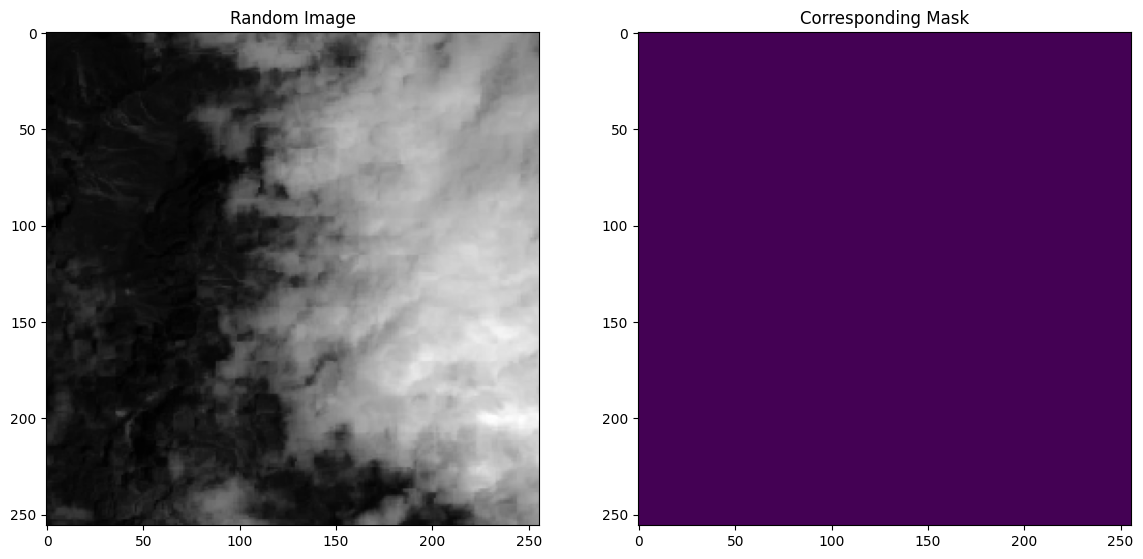

In [ ]:
import os
import cv2
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler
from osgeo import gdal
from skimage.transform import resize
import random
from matplotlib import pyplot as plt

# Initialize MinMaxScaler
minmaxscaler = MinMaxScaler()

# Define the image and mask folder paths
image_folder = '/content/drive/MyDrive/trial mapping/WORK/mask/folder_separate/image/'
mask_folder = '/content/drive/MyDrive/trial mapping/WORK/mask/folder_separate/mask/'

# Initialize lists to store images and masks
image_dataset = []
mask_dataset = []

# Define patch size
image_patch_size = 256

# Desired height and width for resizing
desired_height = 256
desired_width = 256

# Loop through image and mask folders
for folder_type, folder_path in [('image', image_folder), ('mask', mask_folder)]:
    # Loop through files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.tif'):  # Check file extension
            # Load image using gdal
            image_path = os.path.join(folder_path, file_name)
            image_ds = gdal.Open(image_path)

            if image_ds is not None:
                # Read image as numpy array
                image = np.array([image_ds.GetRasterBand(i).ReadAsArray() for i in range(1, image_ds.RasterCount + 1)])

                # Transpose image to match the format expected by patchify (bands, height, width)
                image = np.transpose(image, (1, 2, 0))

                # Patchify the image
                window_shape = (min(image.shape[0], image_patch_size), min(image.shape[1], image_patch_size), image.shape[2])
                patched_images = patchify(image, window_shape, step=image_patch_size)

                # Process individual patches
                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):
                        if folder_type == 'image':
                            # Normalize image patches
                            individual_patched_image = patched_images[i, j, :, :]
                            individual_patched_image = minmaxscaler.fit_transform(
                                individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(
                                individual_patched_image.shape)
                            individual_patched_image = individual_patched_image[0]
                            # Resize image patch
                            resized_image_patch = resize(individual_patched_image, (desired_height, desired_width))
                            image_dataset.append(resized_image_patch)
                        elif folder_type == 'mask':
                            # Resize mask patches
                            individual_patched_mask = patched_images[i, j, :, :]
                            individual_patched_mask = individual_patched_mask[0]
                            # Resize mask patch
                            resized_mask_patch = resize(individual_patched_mask, (desired_height, desired_width))
                            mask_dataset.append(resized_mask_patch)

# Convert lists to NumPy arrays
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

# Print lengths of image and mask datasets
print("Length of image dataset:", len(image_dataset))
print("Length of mask dataset:", len(mask_dataset))

# Generate a random image ID for visualization
random_image_id = random.randint(0, len(image_dataset) - 1)

# Visualize a random image and its corresponding mask
plt.figure(figsize=(14, 8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.title("Random Image")
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])
plt.title("Corresponding Mask")
plt.show()


Length of image dataset: 264
Length of mask dataset: 264


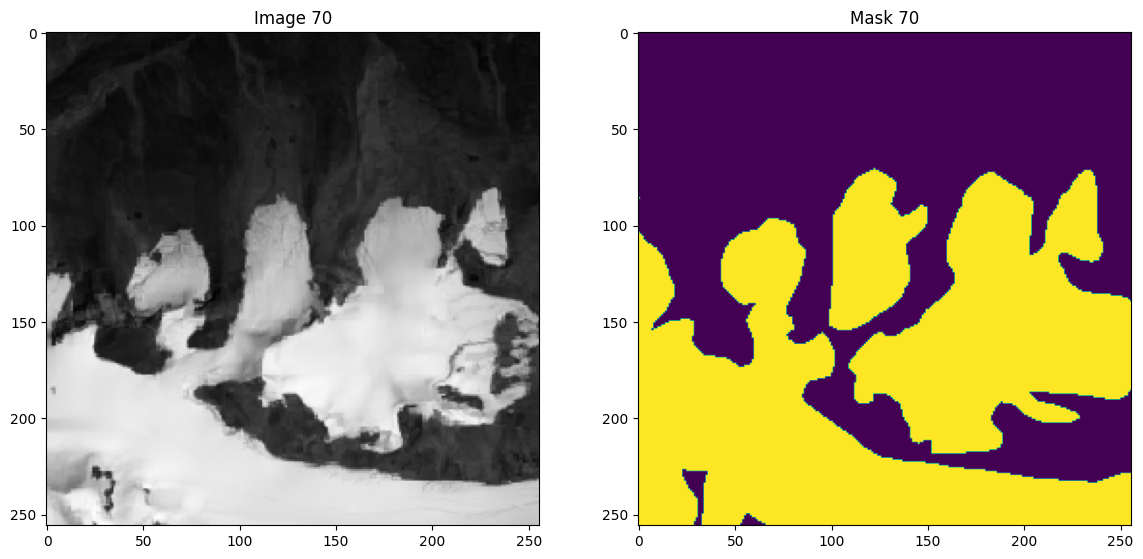

In [ ]:
import os
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler
from osgeo import gdal
import random
from matplotlib import pyplot as plt

# Initialize MinMaxScaler
minmaxscaler = MinMaxScaler()

# Define the image and mask folder paths
image_folder = '/content/drive/MyDrive/trial mapping/WORK/mask/folder_separate/image/'
mask_folder = '/content/drive/MyDrive/trial mapping/WORK/mask/folder_separate/mask/'

# Initialize lists to store images and masks
image_dataset = []
mask_dataset = []

# Define patch size
image_patch_size = 256

# Loop through image and mask folders
for folder_type, folder_path in [('image', image_folder), ('mask', mask_folder)]:
    # Loop through files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.tif'):  # Check file extension
            # Load image using gdal
            image_path = os.path.join(folder_path, file_name)
            image_ds = gdal.Open(image_path)

            if image_ds is not None:
                # Read image as numpy array
                image = np.array([image_ds.GetRasterBand(i).ReadAsArray() for i in range(1, image_ds.RasterCount + 1)])

                # Transpose image to match the format expected by patchify (bands, height, width)
                image = np.transpose(image, (1, 2, 0))

                # Patchify the image
                window_shape = (min(image.shape[0], image_patch_size), min(image.shape[1], image_patch_size), image.shape[2])
                patched_images = patchify(image, window_shape, step=image_patch_size)

                # Process individual patches
                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):
                        if folder_type == 'image':
                            # Normalize image patches
                            individual_patched_image = patched_images[i, j, :, :]
                            individual_patched_image = minmaxscaler.fit_transform(
                                individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(
                                individual_patched_image.shape)
                            individual_patched_image = individual_patched_image[0]
                            image_dataset.append(individual_patched_image)
                        elif folder_type == 'mask':
                            # No resizing needed if masks are already of size 256x256
                            individual_patched_mask = patched_images[i, j, :, :]
                            individual_patched_mask = individual_patched_mask[0]
                            mask_dataset.append(individual_patched_mask)

# Convert lists to NumPy arrays
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

# Print lengths of image and mask datasets
print("Length of image dataset:", len(image_dataset))
print("Length of mask dataset:", len(mask_dataset))

# Generate a random image ID for visualization
random_image_id = random.randint(0, len(image_dataset) - 1)

## Specify the image number you want to visualize
image_number = 70  # Change this to the desired image number

plt.figure(figsize=(14, 8))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.title("Image {}".format(image_number))  # Display image number as title
plt.subplot(122)
plt.imshow(mask_dataset[image_number])
plt.title("Mask {}".format(image_number))  # Display mask number as title
plt.show()


Length of image dataset: 264
Length of mask dataset: 264


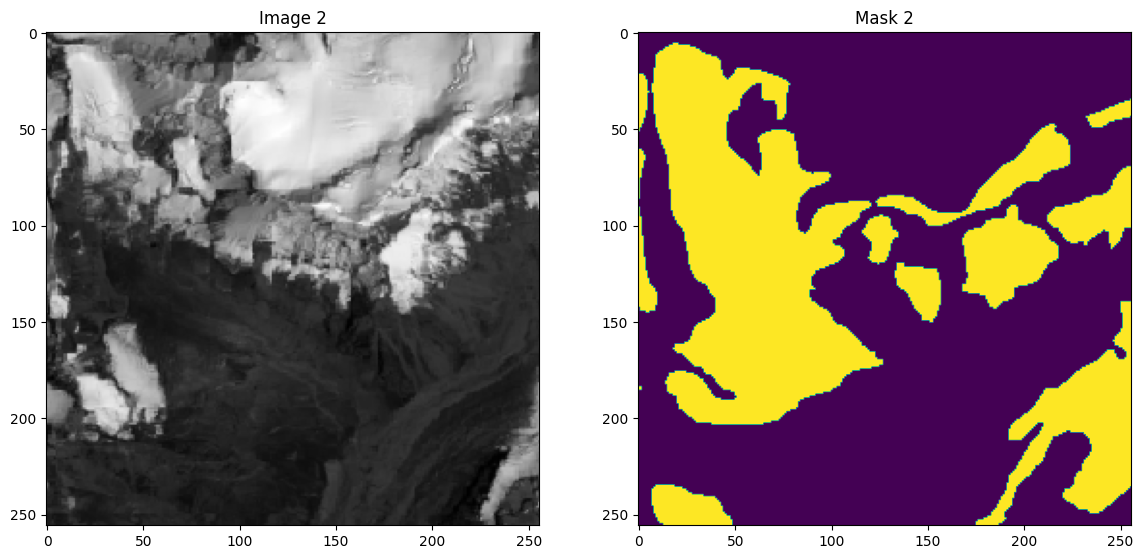

In [ ]:
import os
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler
from osgeo import gdal
import random
from matplotlib import pyplot as plt

# Initialize MinMaxScaler
minmaxscaler = MinMaxScaler()

# Define the image and mask folder paths
image_folder = '/content/drive/MyDrive/trial mapping/WORK/mask/folder_separate/image/'
mask_folder = '/content/drive/MyDrive/trial mapping/WORK/mask/folder_separate/mask/'

# Initialize lists to store images and masks
image_dataset = []
mask_dataset = []

# Define patch size
image_patch_size = 256

# Function to load and process the data
def load_data(folder_path, folder_type):
    data_list = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.tif'):  # Check file extension
            # Load image using gdal
            file_path = os.path.join(folder_path, file_name)
            file_ds = gdal.Open(file_path)
            if file_ds is not None:
                # Read file as numpy array
                data = np.array([file_ds.GetRasterBand(i).ReadAsArray() for i in range(1, file_ds.RasterCount + 1)])

                # Transpose image to match the format expected by patchify (bands, height, width)
                data = np.transpose(data, (1, 2, 0))

                # Patchify the data
                window_shape = (min(data.shape[0], image_patch_size), min(data.shape[1], image_patch_size), data.shape[2])
                patched_data = patchify(data, window_shape, step=image_patch_size)

                # Process individual patches
                for i in range(patched_data.shape[0]):
                    for j in range(patched_data.shape[1]):
                        if folder_type == 'image':
                            # Normalize image patches
                            individual_patch = patched_data[i, j, :, :]
                            individual_patch = minmaxscaler.fit_transform(
                                individual_patch.reshape(-1, individual_patch.shape[-1])).reshape(
                                individual_patch.shape)
                            individual_patch = individual_patch[0]
                            data_list.append(individual_patch)
                        elif folder_type == 'mask':
                            # No resizing needed if masks are already of size 256x256
                            individual_patch = patched_data[i, j, :, :]
                            individual_patch = individual_patch[0]
                            data_list.append(individual_patch)
    return np.array(data_list)

# Load and process the image dataset
image_dataset = load_data(image_folder, 'image')

# Load and process the mask dataset
mask_dataset = load_data(mask_folder, 'mask')

# Print lengths of image and mask datasets
print("Length of image dataset:", len(image_dataset))
print("Length of mask dataset:", len(mask_dataset))

# Generate a random image ID for visualization
random_image_id = random.randint(0, len(image_dataset) - 1)

# Visualize a random image and its corresponding mask
plt.figure(figsize=(14, 8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.title("Image {}".format(random_image_id))  # Display image number as title
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])
plt.title("Mask {}".format(random_image_id))  # Display mask number as title
plt.show()


Length of image dataset: 264
Length of mask dataset: 264
Image height: 256
Image width: 256
Image channels: 3
Total classes: 2


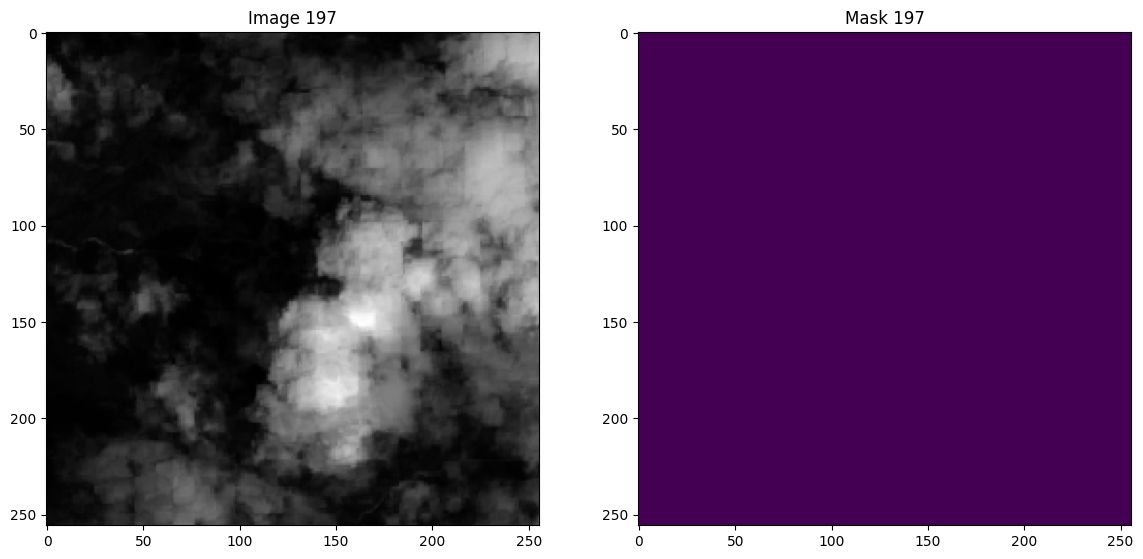

In [ ]:
import os
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler
from osgeo import gdal
import random
from matplotlib import pyplot as plt

# Initialize MinMaxScaler
minmaxscaler = MinMaxScaler()

# Define the image and mask folder paths
image_folder = '/content/drive/MyDrive/trial mapping/WORK/mask/folder_separate/image/'
mask_folder = '/content/drive/MyDrive/trial mapping/WORK/mask/folder_separate/mask/'

# Initialize lists to store images and masks
image_dataset = []
mask_dataset = []

# Define patch size
image_patch_size = 256

# Function to load and process the data
def load_data(folder_path, folder_type):
    data_list = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.tif'):  # Check file extension
            # Load image using gdal
            file_path = os.path.join(folder_path, file_name)
            file_ds = gdal.Open(file_path)
            if file_ds is not None:
                # Read file as numpy array
                data = np.array([file_ds.GetRasterBand(i).ReadAsArray() for i in range(1, file_ds.RasterCount + 1)])

                # Transpose image to match the format expected by patchify (bands, height, width)
                data = np.transpose(data, (1, 2, 0))

                # Patchify the data
                window_shape = (min(data.shape[0], image_patch_size), min(data.shape[1], image_patch_size), data.shape[2])
                patched_data = patchify(data, window_shape, step=image_patch_size)

                # Process individual patches
                for i in range(patched_data.shape[0]):
                    for j in range(patched_data.shape[1]):
                        if folder_type == 'image':
                            # Normalize image patches
                            individual_patch = patched_data[i, j, :, :]
                            individual_patch = minmaxscaler.fit_transform(
                                individual_patch.reshape(-1, individual_patch.shape[-1])).reshape(
                                individual_patch.shape)
                            individual_patch = individual_patch[0]
                            data_list.append(individual_patch)
                        elif folder_type == 'mask':
                            # No resizing needed if masks are already of size 256x256
                            individual_patch = patched_data[i, j, :, :]
                            individual_patch = individual_patch[0]
                            data_list.append(individual_patch)
    return np.array(data_list)

# Load and process the image dataset
image_dataset = load_data(image_folder, 'image')

# Load and process the mask dataset
mask_dataset = load_data(mask_folder, 'mask')

# Print lengths of image and mask datasets
print("Length of image dataset:", len(image_dataset))
print("Length of mask dataset:", len(mask_dataset))

# Calculate image dimensions
image_height, image_width, image_channels = image_dataset.shape[1:]

# Calculate total number of unique classes in the mask dataset
total_classes = len(np.unique(mask_dataset))

# Print calculated values
print("Image height:", image_height)
print("Image width:", image_width)
print("Image channels:", image_channels)
print("Total classes:", total_classes)

# Generate a random image ID for visualization
random_image_id = random.randint(0, len(image_dataset) - 1)

# Visualize a random image and its corresponding mask
plt.figure(figsize=(14, 8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.title("Image {}".format(random_image_id))  # Display image number as title
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])
plt.title("Mask {}".format(random_image_id))  # Display mask number as title
plt.show()


Length of mask dataset: 264


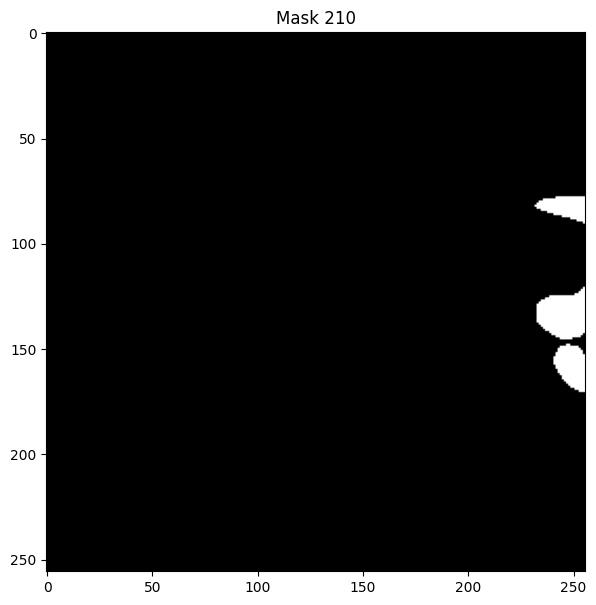

In [ ]:
#no requirement to run
# Define the image and mask folder paths
image_folder = '/content/drive/MyDrive/trial mapping/WORK/mask/folder_separate/image/'
mask_folder = '/content/drive/MyDrive/trial mapping/WORK/mask/folder_separate/mask/'

# Function to load and process the data
def load_data(folder_path, folder_type):
    data_list = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.tif'):  # Check file extension
            # Load image using gdal
            file_path = os.path.join(folder_path, file_name)
            file_ds = gdal.Open(file_path)
            if file_ds is not None:
                # Read file as numpy array
                data = np.array([file_ds.GetRasterBand(i).ReadAsArray() for i in range(1, file_ds.RasterCount + 1)])

                # Transpose image to match the format expected by patchify (bands, height, width)
                data = np.transpose(data, (1, 2, 0))

                # Patchify the data
                window_shape = (min(data.shape[0], image_patch_size), min(data.shape[1], image_patch_size), data.shape[2])
                patched_data = patchify(data, window_shape, step=image_patch_size)

                # Process individual patches
                for i in range(patched_data.shape[0]):
                    for j in range(patched_data.shape[1]):
                        if folder_type == 'image':
                            # Normalize image patches
                            individual_patch = patched_data[i, j, :, :]
                            individual_patch = minmaxscaler.fit_transform(
                                individual_patch.reshape(-1, individual_patch.shape[-1])).reshape(
                                individual_patch.shape)
                            individual_patch = individual_patch[0]
                            data_list.append(individual_patch)
                        elif folder_type == 'mask':
                            # No resizing needed if masks are already of size 256x256
                            individual_patch = patched_data[i, j, :, :]
                            individual_patch = individual_patch[0]
                            # Convert binary mask to labels
                            individual_patch = individual_patch.astype(np.uint8)  # Ensure dtype is uint8
                            data_list.append(individual_patch)
    return np.array(data_list)

# Load and process the mask dataset
mask_dataset = load_data(mask_folder, 'mask')

# Print lengths of mask dataset
print("Length of mask dataset:", len(mask_dataset))

# Generate a random mask ID for visualization
random_mask_id = random.randint(0, len(mask_dataset) - 1)

# Visualize a random mask
plt.figure(figsize=(7, 7))
plt.imshow(mask_dataset[random_mask_id], cmap='gray')  # Use grayscale colormap for binary masks
plt.title("Mask {}".format(random_mask_id))  # Display mask number as title
plt.show()


Length of mask dataset: 264


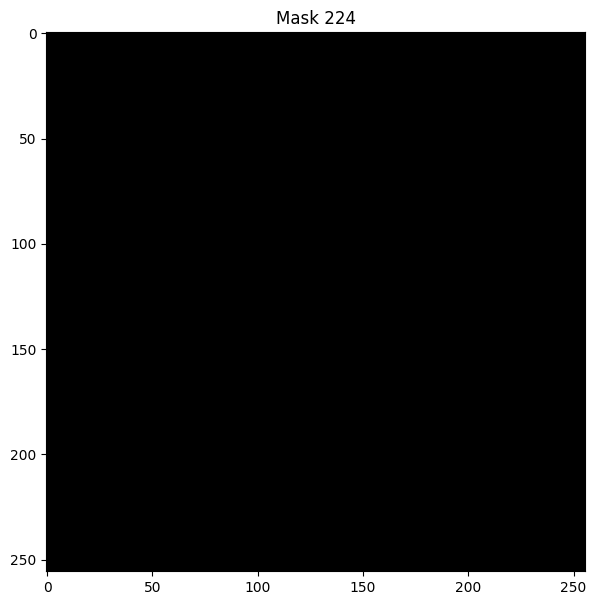

In [ ]:
# no requiremt to run
# Define the image and mask folder paths
image_folder = '/content/drive/MyDrive/trial mapping/WORK/mask/folder_separate/image/'
mask_folder = '/content/drive/MyDrive/trial mapping/WORK/mask/folder_separate/mask/'

# Define the RGB values for clean ice glacier and unlabeled data
class_ice_glacier_rgb = (60, 17, 152)  # RGB value for clean ice glacier
class_unlabeled_rgb = (155, 155, 155)   # RGB value for unlabeled data

# Function to convert RGB masks to binary labels
def rgb_to_label(rgb_mask):
    label_segment = np.zeros(rgb_mask.shape[:2], dtype=np.uint8)
    label_segment[np.all(rgb_mask == class_unlabeled_rgb, axis=-1)] = 0
    label_segment[np.all(rgb_mask == class_ice_glacier_rgb, axis=-1)] = 1
    return label_segment

# Function to load and process the data
def load_data(folder_path, folder_type):
    data_list = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.tif'):  # Check file extension
            # Load image using gdal
            file_path = os.path.join(folder_path, file_name)
            file_ds = gdal.Open(file_path)
            if file_ds is not None:
                # Read file as numpy array
                data = np.array([file_ds.GetRasterBand(i).ReadAsArray() for i in range(1, file_ds.RasterCount + 1)])

                # Transpose image to match the format expected by patchify (bands, height, width)
                data = np.transpose(data, (1, 2, 0))

                # Patchify the data
                window_shape = (min(data.shape[0], image_patch_size), min(data.shape[1], image_patch_size), data.shape[2])
                patched_data = patchify(data, window_shape, step=image_patch_size)

                # Process individual patches
                for i in range(patched_data.shape[0]):
                    for j in range(patched_data.shape[1]):
                        if folder_type == 'image':
                            # Normalize image patches
                            individual_patch = patched_data[i, j, :, :]
                            individual_patch = minmaxscaler.fit_transform(
                                individual_patch.reshape(-1, individual_patch.shape[-1])).reshape(
                                individual_patch.shape)
                            individual_patch = individual_patch[0]
                            data_list.append(individual_patch)
                        elif folder_type == 'mask':
                            # No resizing needed if masks are already of size 256x256
                            individual_patch = patched_data[i, j, :, :]
                            individual_patch = individual_patch[0]
                            # Convert RGB mask to binary label
                            individual_patch = rgb_to_label(individual_patch)
                            data_list.append(individual_patch)
    return np.array(data_list)

# Load and process the mask dataset
mask_dataset = load_data(mask_folder, 'mask')

# Print lengths of mask dataset
print("Length of mask dataset:", len(mask_dataset))

# Generate a random mask ID for visualization
random_mask_id = random.randint(0, len(mask_dataset) - 1)

# Visualize a random mask
plt.figure(figsize=(7, 7))
plt.imshow(mask_dataset[random_mask_id], cmap='gray')  # Use grayscale colormap for binary masks
plt.title("Mask {}".format(random_mask_id))  # Display mask number as title
plt.show()


In [ ]:
# Load and process the mask dataset
mask_dataset = load_data(mask_folder, 'mask')

# Print lengths of mask dataset
print("Length of mask dataset:", len(mask_dataset))

# Print total unique labels based on masks
unique_labels = np.unique(mask_dataset)
print("Total unique labels based on masks:", unique_labels)



Length of mask dataset: 264
Total unique labels based on masks: [0. 1.]


In [ ]:
# Calculate the total number of unique classes in the mask dataset
total_classes = len(unique_labels)

# Print the total number of unique classes
print("Total number of unique classes:", total_classes)



Total number of unique classes: 2


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Load and process the mask dataset
mask_dataset = load_data(mask_folder, 'mask')

# Print lengths of mask dataset
print("Length of mask dataset:", len(mask_dataset))

# Print total unique labels based on masks
unique_labels = np.unique(mask_dataset)
print("Total unique labels based on masks:", unique_labels)

# Calculate the total number of unique classes in the mask dataset
total_classes = len(unique_labels)

# Print the total number of unique classes
print("Total number of unique classes:", total_classes)

# Create labels from mask dataset
labels = mask_dataset

# Convert labels to categorical
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)


Length of mask dataset: 264
Total unique labels based on masks: [0. 1.]
Total number of unique classes: 2


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(224, 256, 256, 3)
(40, 256, 256, 3)
(224, 256, 256, 2)
(40, 256, 256, 2)


In [ ]:
#! pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-i31hwtfr
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models /tmp/pip-req-build-i31hwtfr
  Resolved https://github.com/qubvel/segmentation_models to commit e951c6747f75fa9e7240816d1c79dd2e66813123
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 949.8 kB/s eta 0:00:00
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-py3-none-any.whl size=33787 sha256=2d94af0e294fc385de3b6aa7a4817132ea74e26ce9cc6d2d4a4effa980d655ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-ew2d_q_j/wheels/ce/d6/f1/5d00e82b3893c5f1ffee43bf7b8877148af09c7c9c6c4882c9
Successfully built segmentation-models


In [ ]:
import tensorflow as tf
import os
import tensorflow_datasets as tfds

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models as sm
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [ ]:
from keras import backend as K

In [ ]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [ ]:
def multi_unet_model(n_classes=1, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [ ]:
metrics = ["accuracy", jaccard_coef]

In [ ]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
2


In [ ]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [ ]:
model = get_deep_learning_model()

In [ ]:
weights = [0.3,0.7]

In [ ]:
import segmentation_models as sm

In [ ]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [ ]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [ ]:
total_loss = dice_loss + (1 * focal_loss)

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [ ]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=15,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/15
14/14 [==============================] - 174s 12s/step - loss: 0.8611 - accuracy: 0.8566 - jaccard_coef: 0.3682 - val_loss: 0.8496 - val_accuracy: 0.8638 - val_jaccard_coef: 0.3577
Epoch 2/15
14/14 [==============================] - 171s 12s/step - loss: 0.8409 - accuracy: 0.8703 - jaccard_coef: 0.4137 - val_loss: 0.8107 - val_accuracy: 0.8686 - val_jaccard_coef: 0.5125
Epoch 3/15
14/14 [==============================] - 163s 12s/step - loss: 0.8051 - accuracy: 0.7779 - jaccard_coef: 0.5597 - val_loss: 0.7718 - val_accuracy: 0.8452 - val_jaccard_coef: 0.6431
Epoch 4/15
14/14 [==============================] - 165s 12s/step - loss: 0.7803 - accuracy: 0.8159 - jaccard_coef: 0.6519 - val_loss: 0.7860 - val_accuracy: 0.8738 - val_jaccard_coef: 0.7199
Epoch 5/15
14/14 [==============================] - 163s 12s/step - loss: 0.7723 - accuracy: 0.8327 - jaccard_coef: 0.6875 - val_loss: 0.7756 - val_accuracy: 0.8738 - val_jaccard_coef: 0.7084
Epoch 6/15
14/14 [======================

In [ ]:

history_a = model_history

In [ ]:
history_a.history

{'loss': [0.861108124256134,
  0.8409457802772522,
  0.805149257183075,
  0.7803452610969543,
  0.7722991704940796,
  0.7670472860336304,
  0.765816867351532,
  0.7636226415634155,
  0.7624594569206238,
  0.7594507336616516,
  0.7504358291625977,
  0.7363333702087402,
  0.7396368384361267,
  0.7240194082260132,
  0.7051499485969543],
 'accuracy': [0.8566069602966309,
  0.8703378438949585,
  0.7779168486595154,
  0.8159255385398865,
  0.8327120542526245,
  0.8425379395484924,
  0.844663143157959,
  0.8472782969474792,
  0.8493390083312988,
  0.8503597378730774,
  0.8612900972366333,
  0.8718677759170532,
  0.8692389726638794,
  0.8805991411209106,
  0.8930358290672302],
 'jaccard_coef': [0.368224173784256,
  0.4136956036090851,
  0.5596948862075806,
  0.651910662651062,
  0.6875244379043579,
  0.6924763917922974,
  0.6969709396362305,
  0.7002201080322266,
  0.7005022168159485,
  0.7020760774612427,
  0.7210111021995544,
  0.7421576380729675,
  0.7393649816513062,
  0.7634523510932922,


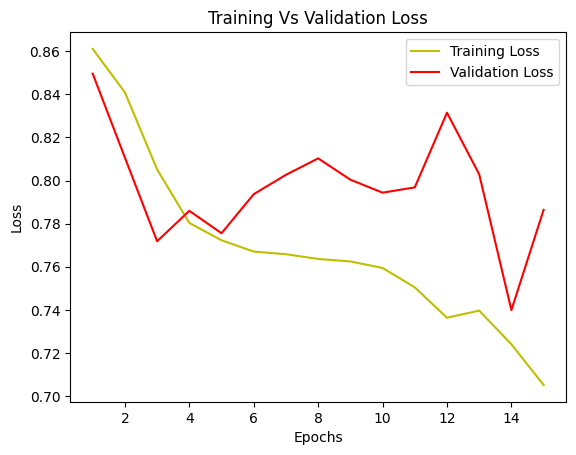

In [ ]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

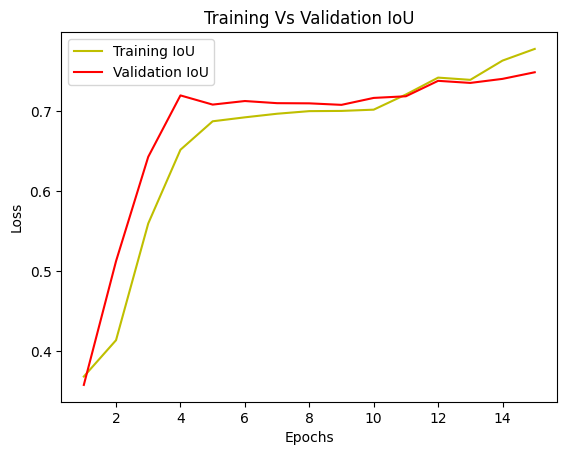

In [ ]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
model_history.params

{'verbose': 1, 'epochs': 15, 'steps': 14}

In [ ]:

y_pred = model.predict(X_test)

2/2 [==============================] - 8s 1s/step


In [ ]:
len(y_pred)

40

In [ ]:
y_pred

array([[[[0.38219273, 0.6178072 ],
         [0.24629653, 0.7537034 ],
         [0.16563138, 0.8343687 ],
         ...,
         [0.84916806, 0.15083186],
         [0.83107156, 0.16892841],
         [0.79831547, 0.20168452]],

        [[0.38629565, 0.6137044 ],
         [0.2087622 , 0.7912378 ],
         [0.17344162, 0.82655835],
         ...,
         [0.9407909 , 0.05920914],
         [0.9136864 , 0.08631358],
         [0.8842424 , 0.11575759]],

        [[0.52104616, 0.4789538 ],
         [0.565761  , 0.43423903],
         [0.37623045, 0.6237696 ],
         ...,
         [0.968542  , 0.03145801],
         [0.9520187 , 0.04798133],
         [0.91886294, 0.08113702]],

        ...,

        [[0.81657654, 0.18342341],
         [0.9294253 , 0.07057465],
         [0.93509656, 0.06490348],
         ...,
         [0.39623743, 0.60376245],
         [0.43444115, 0.5655588 ],
         [0.5800878 , 0.4199122 ]],

        [[0.7860527 , 0.2139472 ],
         [0.8941899 , 0.10581008],
         [0.

In [ ]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [ ]:

len(y_pred_argmax)

40

In [ ]:
y_pred_argmax

array([[[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_test_argmax = np.argmax(y_test, axis=3)

In [ ]:
y_test_argmax

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 

In [ ]:
import random

In [ ]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 0s 160ms/step


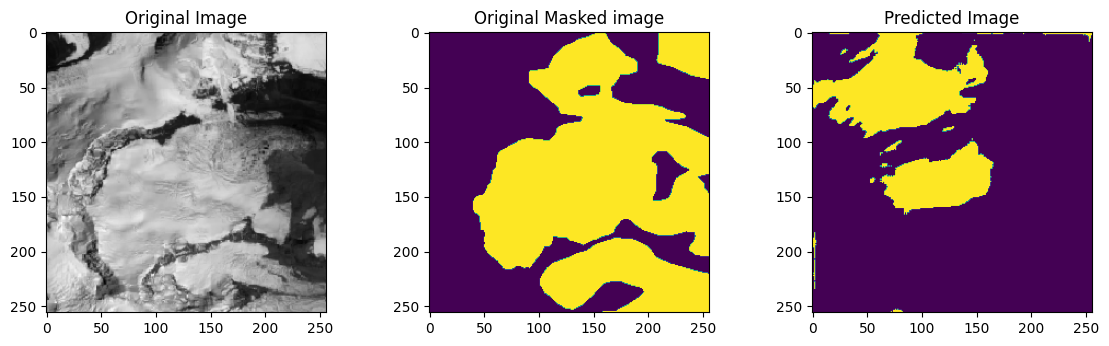

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)